### 나무 모형(Decision Tree)

의사결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석방법

2진 분류기법

뿌리마디 Root Node

부모마디 - 자식마디

가지 Branch

중간마디 Internal Node

끝마디 / 잎 Terminal Node

깊이 Depth : 뿌리마디부터 몇 번째 마디인지

`-` 뿌리노드의 결정

모든 변수 중 전체 자료를 가장 분명하게 구분하는 변수를 뿌리 노드로 선택

`-` 목표변수가 이산형인 분류나무의 경우 가지 분할을 수행할 때 분류 기준값의 선택방법

1. 엔트로피 계수 : 이 값이 클수록 자식 노드 내의 이질성이 큼. 모든 변수들에 대해 엔트로피를 구하고 최소가 되는 변수를 뿌리노드로 선정
> $\sum_{i = 1}^{n}-p_i \log_2(p_i)$으로 계산한다.

2. 지니계수 : 이 값이 클수록 자식 노드 내의 이질성이 큼
> 1에서 각 개체 간 비율의 제곱을 뺀 값으로 정의한다. 같은 개체가 많을수록 비율의 제곱이 1에 가까우므로 값이 작아진다.

3. 카이제곱 통계량 : 각 셀에 대한 ((실제도수 - 기대도수)의 제곱 / 기대도수)의 합. p-value로 판단
4. 정보이득 : 뿌리마디에서 분할했을 때 분할전과 분할후의 엔트로피 차이. 분할후의 엔트로피가 낮을수록 정보이득이 큼.

여러 개의 가지를 분할할 때는 CHAID를 씀. CART는 이진분리로 가장 널리 사용함.

`-` `rpart()` : CART 알고리즘을 이용.

> 목적변수가 이산형인 경우 지니를 사용하고, 연속형은 분산(MSE)을 이용해 이진분리를 사용.

In [2]:
library(MASS)
library(rpart)
data(iris)
attach(iris)

In [3]:
c = rpart(Species~., data = iris)  ## 회귀모형처럼 이용
c

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

`-` 시각화

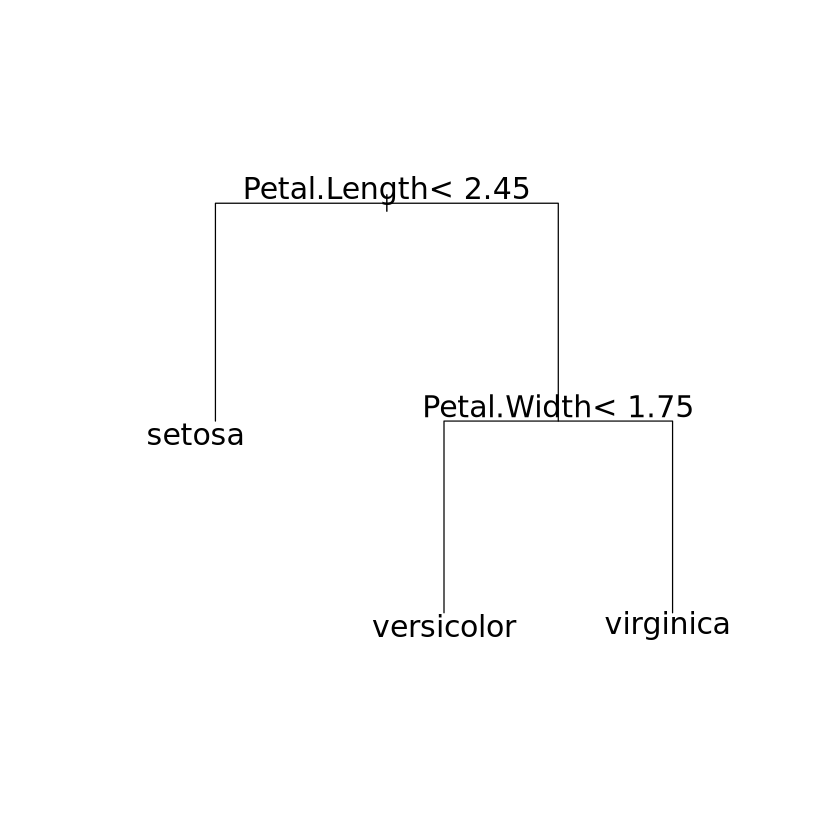

In [13]:
plot(c, compress = T, margin = 0.2)
text(c, cex = 1.5)

In [22]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [24]:
predict(c, newdata = iris[, -5], type = "class") |> head()

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

예측이 잘 된다는 것을 확인할 수 있음.

`-` 시각화 2 : `rpart.plot`

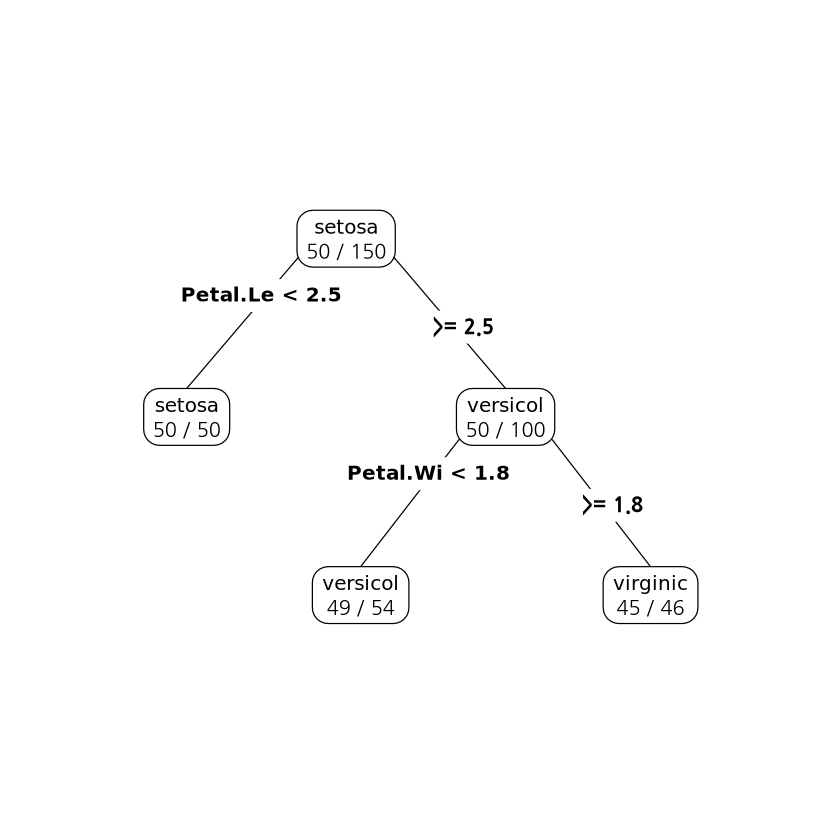

In [28]:
library(rpart.plot)
prp(c, type = 4, extra = 2)

> Petal.Length > 2.5를 만족하는 50개의 개체 중 setosa는 50개이다.
>
> Petal.Length <= 2.4와 Petal.Width < 1.8을 만족하는 노드에 속하는 54개의 개체 중 49개는 versicol이다.

`-` 실습 : `rattle` 패키지의 weather자료

In [30]:
library(rattle)
data(weather)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



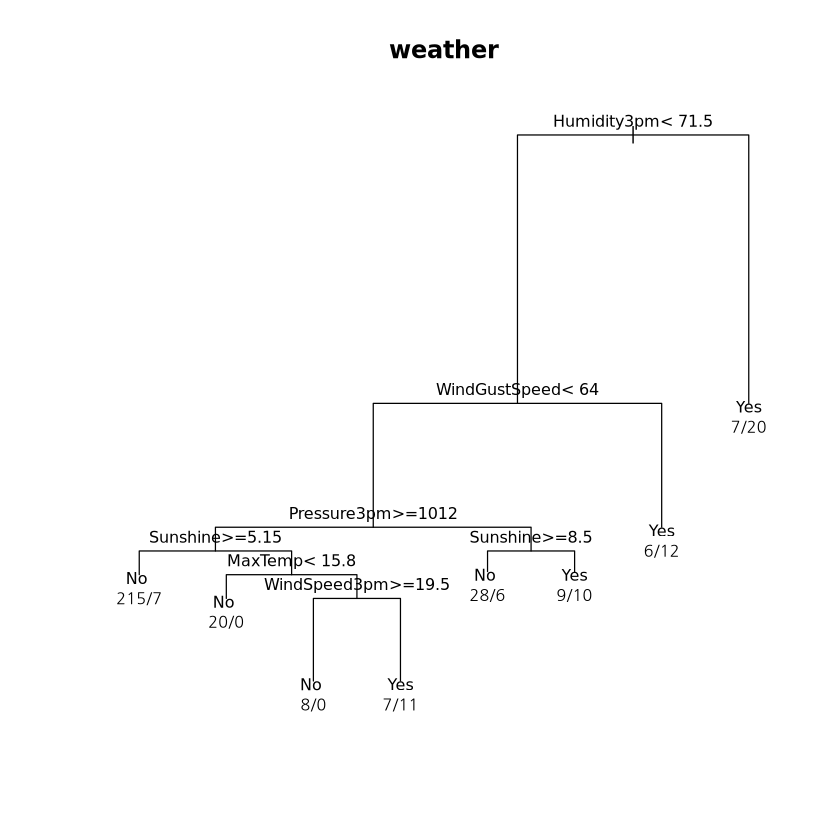

In [38]:
tree1 = rpart(RainTomorrow~., data = weather[, c(3:22, 24)])
plot(tree1, main = "weather", margin = 0.025)
text(tree1, use.n = TRUE, cex = 0.8)

> 이 그림은 두 개의 합산으로 주어짐.

In [39]:
tree1

n= 366 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 366 66 No (0.81967213 0.18032787)  
   2) Humidity3pm< 71.5 339 46 No (0.86430678 0.13569322)  
     4) WindGustSpeed< 64 321 34 No (0.89408100 0.10591900)  
       8) Pressure3pm>=1011.75 268 18 No (0.93283582 0.06716418)  
        16) Sunshine>=5.15 222  7 No (0.96846847 0.03153153) *
        17) Sunshine< 5.15 46 11 No (0.76086957 0.23913043)  
          34) MaxTemp< 15.8 20  0 No (1.00000000 0.00000000) *
          35) MaxTemp>=15.8 26 11 No (0.57692308 0.42307692)  
            70) WindSpeed3pm>=19.5 8  0 No (1.00000000 0.00000000) *
            71) WindSpeed3pm< 19.5 18  7 Yes (0.38888889 0.61111111) *
       9) Pressure3pm< 1011.75 53 16 No (0.69811321 0.30188679)  
        18) Sunshine>=8.5 34  6 No (0.82352941 0.17647059) *
        19) Sunshine< 8.5 19  9 Yes (0.47368421 0.52631579) *
     5) WindGustSpeed>=64 18  6 Yes (0.33333333 0.66666667) *
   3) Humidity3pm>=71.5 27  7 Yes (0.25925926 0

마지막 줄 의미

Humidity3pm >= 71.5인 노드에서 사례 수가 27개이고, 손실은 7, 예측값(끝마디), 예측값 비율

In [44]:
pred1 = predict(tree1, type = "prob")[,2]
cut = sort(pred1)[301]
pred_la = ifelse(pred1 >= cut, "Yes", "No")
table(pred_la, weather$RainTomorrow, dnn = c("tredicated", "observed"))

          observed
tredicated  No Yes
       No  271  13
       Yes  29  53

정의(Confusion matrix)

위음(false negative) 예측률 : no로 예측된 사례 중 실제 yes로 관측된 사례의 비율

위양(false positive) 예측률 : yes로 예측된 사례 중 실제 no로 관측된 사례의 비율

총 정확도 : 전체 사례 중 정확하게 예측한 사례의 비율

In [48]:
data(stagec)
attach(stagec)

In [47]:
stagec$ploidy

[1] diploid    aneuploid  diploid    diploid    tetraploid diploid   
  [7] tetraploid aneuploid  diploid    tetraploid tetraploid tetraploid
 [13] diploid    tetraploid tetraploid diploid    diploid    tetraploid
 [19] tetraploid tetraploid tetraploid tetraploid diploid    tetraploid
 [25] tetraploid tetraploid tetraploid diploid    tetraploid tetraploid
 [31] tetraploid aneuploid  diploid    tetraploid tetraploid diploid   
 [37] tetraploid diploid    aneuploid  tetraploid tetraploid diploid   
 [43] diploid    diploid    diploid    diploid    diploid    diploid   
 [49] diploid    diploid    tetraploid diploid    tetraploid tetraploid
 [55] diploid    diploid    tetraploid diploid    diploid    aneuploid 
 [61] tetraploid tetraploid aneuploid  diploid    diploid    tetraploid
 [67] diploid    tetraploid diploid    diploid    diploid    tetraploid
 [73] diploid    tetraploid diploid    tetraploid tetraploid tetraploid
 [79] tetraploid diploid    tetraploid diploid    diploid    diploid   
 [85] tetraploid diploid    diploid    tetraploid diploid    tetraploid
 [91] tetraploid diploid    diploid    tetraploid tetraploid tetraploid
 [97] tetraploid tetraploid diploid    diploid    tetraploid tetraploid
[103] tetraploid diploid    tetraploid tetraploid tetraploid tetraploid
[109] tetraploid aneuploid  aneuploid  tetraploid tetraploid diploid   
[115] aneuploid  tetraploid diploid    diploid    diploid    diploid   
[121] tetraploid tetraploid diploid    tetraploid diploid    tetraploid
[127] diploid    diploid    tetraploid diploid    aneuploid  tetraploid
[133] tetraploid diploid    diploid    diploid    diploid    tetraploid
[139] diploid    diploid    diploid    diploid    tetraploid aneuploid 
[145] diploid    diploid   
Levels: diploid tetraploid aneuploid


	 Conditional inference tree with 3 terminal nodes

Response:  ploidy 
Inputs:  pgtime, pgstat, age, eet, g2, grade, gleason 
Number of observations:  103 

1) g2 <= 13.01; criterion = 1, statistic = 46.492
  2) pgstat <= 0; criterion = 0.976, statistic = 8.568
    3)*  weights = 42 
  2) pgstat > 0
    4)*  weights = 10 
1) g2 > 13.01
  5)*  weights = 51 

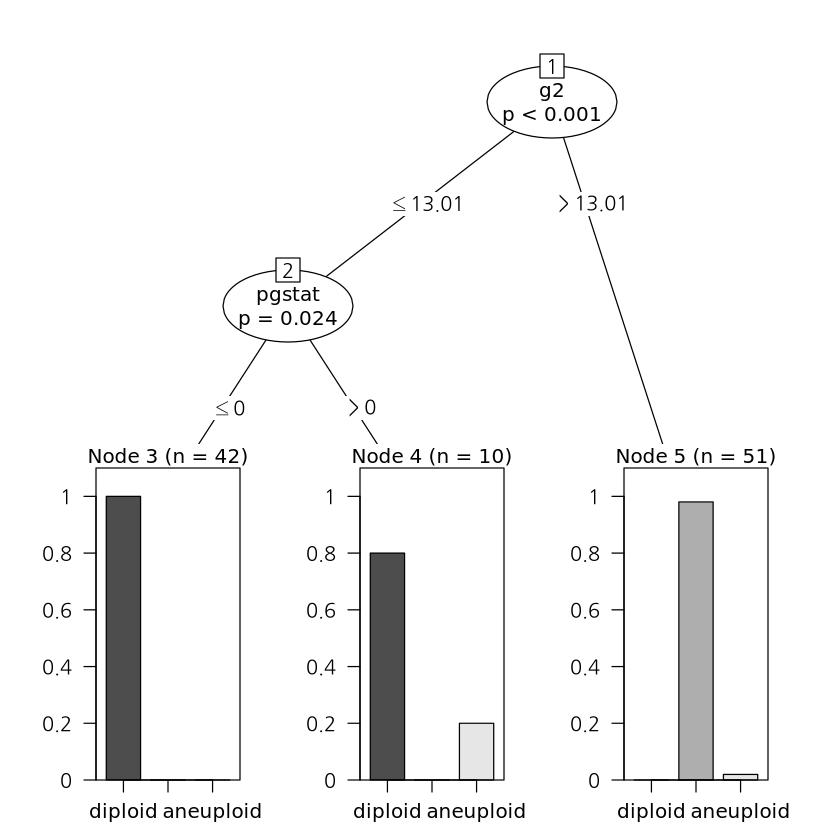

In [54]:
# install.packages("party")
library(party)

stagec1 = subset(stagec, !is.na(g2))
stagec2 = subset(stagec1, !is.na(gleason))
stagec3 = subset(stagec1, !is.na(eet))

set.seed(1234)
ind = sample(2, nrow(stagec3), replace = TRUE, prob = c(0.7, 0.3))  ## 샘플 데이터 자르기
trainData = stagec3[ind == 1,]
testData = stagec3[ind == 2,]

tree = ctree(ploidy~., data = trainData)
tree
plot(tree)

In [55]:
testPred = predict(tree, newdata = testData)
table(testPred, testData$ploidy)

            
testPred     diploid tetraploid aneuploid
  diploid         17          0         2
  tetraploid       0         15         0
  aneuploid        0          0         0

> 예측에는 aneuploid가 하나도 없음, 총 정확도는 32/34정도로 잘 됨. 끝

시험은 시계열 자료 분석 이후, 컴퓨터 사용 안함...?

코드 / 결과 해석

내용 4253H, twiceit이 뭐냐, 데이터를 주고 괄호된 부분만 계산해봐라 등등...

시계열자료 로버스트 선형회귀 다변량 군집화 나무그림

책 내용 중심으로 해서 코드도 보고 그림 내용도 해석할 줄 알고 해서 총체적으로 물어볼 거야

ppt로 따로 보여준 거, 군집화 내용은 그냥 책 내용 이해시키려고 해놓은 거.

> 다음주 화요일 날 보기로 했는데, 한시간 내로 쓸 수 있는 문제를 내야겠네. 끝